<a href="https://colab.research.google.com/github/amit2020cs/Communicate-Data-Finding/blob/master/exploration_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Communicate Data Finding
## by (Amit Kumar Singh)


# Introduction
Ford GoBike is the Bay Area's bike share system. Bay Area Bike Share was introduced in 2013 as a pilot program for the region, with 700 bikes and 70 stations across San Francisco and San Jose. Once expansion is complete, Ford GoBike will grow to 7,000 bikes across San Francisco, the East Bay and San Jose.

## Preliminary Wranging

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

In [2]:
df = pd.read_csv('fordgo_master_clean.csv')

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,member_age,distance_km
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,32.0,0.942931
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,54.0,3.069727
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN,NaN,0.000000
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN,NaN,1.046622
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female,22.0,0.636339


In [4]:
df.shape

(519700, 17)

In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,member_age,distance_km
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,453159.000000,453159.000000,519700.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079,1980.404787,38.595213,1.587077
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959,10.513488,10.513488,1.010391
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000,1886.000000,20.000000,0.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000,1974.000000,31.000000,0.899642
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000,1983.000000,36.000000,1.400244
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000,1988.000000,45.000000,2.072494
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,1999.000000,133.000000,68.186787


In [6]:
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,member_age,distance_km
369455,357,2017-09-07 20:18:37.070,2017-09-07 20:24:34.661,163,Lake Merritt BART Station,37.797320,-122.265320,185,Jackson St at 14th St,37.801858,-122.265368,96,Subscriber,1987.0,Male,32.0,0.504620
26777,1201,2017-12-18 12:54:38.496,2017-12-18 13:14:39.863,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,44,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,3210,Customer,1984.0,Male,35.0,2.159999
348319,969,2017-09-14 10:44:05.408,2017-09-14 11:00:14.560,211,Broadway at 40th St,37.827757,-122.256716,197,El Embarcadero at Grand Ave,37.808848,-122.249680,402,Subscriber,1973.0,Male,46.0,2.191572
513985,481,2017-07-05 17:57:28.758,2017-07-05 18:05:29.971,50,2nd St at Townsend St - Coming Soon,37.780526,-122.390288,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,870,Subscriber,1984.0,Male,35.0,1.688445
47054,1298,2017-12-12 12:31:46.948,2017-12-12 12:53:24.983,134,Valencia St at 24th St,37.752428,-122.420628,321,5th at Folsom,37.780146,-122.403071,2765,Subscriber,1984.0,Female,35.0,3.446881
40131,869,2017-12-14 07:42:25.263,2017-12-14 07:56:55.220,28,The Embarcadero at Bryant St,37.787168,-122.388098,6,The Embarcadero at Sansome St,37.804770,-122.403234,1201,Subscriber,1956.0,Male,63.0,2.366346
382505,782,2017-09-04 03:00:28.004,2017-09-04 03:13:30.667,17,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,6,The Embarcadero at Sansome St,37.804770,-122.403234,789,Customer,NaN,NaN,NaN,1.493184
18857,687,2017-12-20 15:13:37.305,2017-12-20 15:25:04.509,42,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,47,4th St at Harrison St,37.780955,-122.399749,2027,Subscriber,1969.0,Female,50.0,1.644285
371639,744,2017-09-07 11:21:18.950,2017-09-07 11:33:43.123,162,Franklin St at 9th St,37.800516,-122.272080,163,Lake Merritt BART Station,37.797320,-122.265320,1223,Subscriber,1956.0,Male,63.0,0.692184
258228,291,2017-10-10 10:25:10.893,2017-10-10 10:30:02.846,79,7th St at Brannan St,37.773492,-122.403673,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,3019,Subscriber,1985.0,Female,34.0,0.796930


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 17 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
member_age                 453159 non-null float64
distance_km                519700 non-null float64
dtypes: float64(7), int64(4), object

## Data Cleaning

In [8]:
df_clean = df.copy()

Missing 

In [9]:
# Change the format 
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

In [10]:
df_clean.user_type = df_clean.user_type.astype('category')
df_clean.member_gender = df_clean.member_gender.astype('category')

In [11]:

def change_to_string(df,fields):
    for field in fields:
        df[field] = df[field].astype(np.object)
    return df

In [12]:
df_clean = change_to_string (df_clean,['start_station_id', 'end_station_id','bike_id'])

In [13]:
df_clean.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 17 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null object
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null object
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null object
user_type                  519700 non-null category
member_birth_year          453159 non-null float64
member_gender              453238 non-null category
member_age                 453159 non-null float64
distance_km                519700 non-null float64
dtypes: categ

In [14]:
# Member age
df_clean['member_age'] = 2019 - df_clean['member_birth_year']

In [15]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,member_age,distance_km
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,32.0,0.942931
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,54.0,3.069727
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN,NaN,0.000000
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN,NaN,1.046622
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female,22.0,0.636339


In [16]:
#Member average age
df_clean.member_age.mean()

38.595212717831934

In [17]:
df_clean.member_age.describe()

count    453159.000000
mean         38.595213
std          10.513488
min          20.000000
25%          31.000000
50%          36.000000
75%          45.000000
max         133.000000
Name: member_age, dtype: float64

In [18]:
df_clean.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,member_age,distance_km
69074,1053,2017-12-06 08:46:00.197,2017-12-06 09:03:33.269,96,Dolores St at 15th St,37.766210,-122.426614,17,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,2593,Subscriber,1983.0,Male,36.0,3.888299
412326,689,2017-08-24 14:15:15.111,2017-08-24 14:26:44.243,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2626,Subscriber,1978.0,Male,41.0,2.088456
258169,957,2017-10-10 10:35:01.019,2017-10-10 10:50:58.377,60,8th St at Ringold St,37.774520,-122.409449,119,18th St at Noe St,37.761047,-122.432642,2580,Customer,1980.0,Male,39.0,2.529894
435984,444,2017-08-16 09:25:09.931,2017-08-16 09:32:34.219,324,Union Square (Powell St at Post St),37.788300,-122.408531,37,2nd St at Folsom St,37.785000,-122.395936,2062,Subscriber,1990.0,Female,29.0,1.166070
130434,723,2017-11-15 15:05:20.158,2017-11-15 15:17:23.683,35,Cahill Park,37.329119,-121.904576,310,San Fernando St at 4th St,37.335885,-121.885660,1909,Subscriber,1994.0,Male,25.0,1.833877


## Calculate the distance between two point

In [19]:
# Distance calculated using the https://stackoverflow.com/questions/27928/calculate-distance-between-two-latitude-longitude-points-haversine-formula.
import math
from math import radians, sin, cos, acos

def distance(origin, destination):

    lat1, long1 = origin
    lat2, long2 = destination
    radius = 6371
    # this is in kilometers - will convert to US units of miles after

    dlat = math.radians(lat2 - lat1)
    dlong = math.radians(long2 - long1)
    
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlong / 2) * math.sin(dlong / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [106]:
# Using the calcuated math on our columns for lat and long
df_clean['distance_km'] = df_clean.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

In [ ]:
df_clean.sample(5)

### Save the cleaned data set to a new file

In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 17 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null object
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null object
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null object
user_type                  519700 non-null category
member_birth_year          453159 non-null float64
member_gender              453238 non-null category
member_age                 453159 non-null float64
distance_km                519700 non-null float64
dtypes: categ

In [26]:
df_clean.to_csv('fordgo_master_clean.csv', index = False)

### What is the structure of your dataset?

Trip Duration (seconds)  
Start Time and Date  
End Time and Date  
Start Station ID  
Start Station Name   
Start Station Latitude   
Start Station Longitude   
End Station ID   
End Station Name   
End Station Latitude    
End Station Longitude   
Bike ID     
User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)     
Member Year of Birth    
Member Gender   
Member age
Distance(km)

### What is/are the main feature(s) of interest in your dataset
User Type   
Member Gender

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Start Station Latitude      
Start Station Longitude    
End Station Latitude       
End Station Longitude

## Univariate Exploration

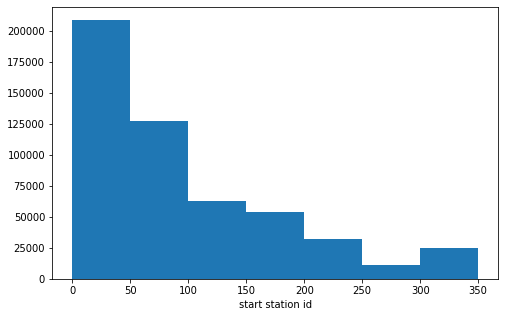

In [66]:
binsize = 50
bins = np.arange(0, df_clean['start_station_id'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'start_station_id', bins = bins)
plt.xlabel('start station id')
plt.show()

This is univariate plot between count of no of users between different station id. 
We can interprate from the graph that most of the users are from station ids range 0 to 50

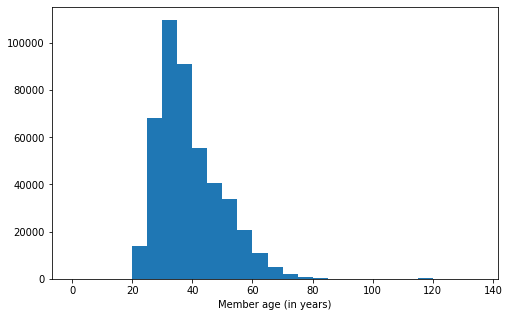

In [54]:
binsize = 5
bins = np.arange(0, df_clean['member_age'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'member_age', bins = bins)
plt.xlabel('Member age (in years)')
plt.show()

 we can observe from that most of the members using the fordgo-bike servie are of 30 to 35 years of age

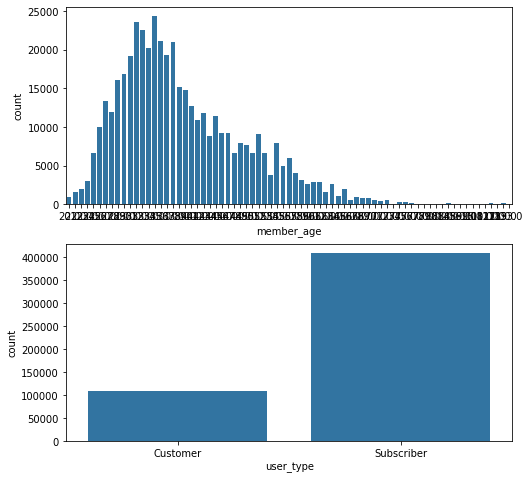

In [65]:
fig, ax = plt.subplots(nrows=2, figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = df_clean, x = 'member_age', color = default_color, ax = ax[0])
sb.countplot(data = df_clean, x = 'user_type', color = default_color, ax = ax[1])

plt.show()

the number of subscriber is more than customer. there are more than 350000 subscribers and the number of customers are approx 100000

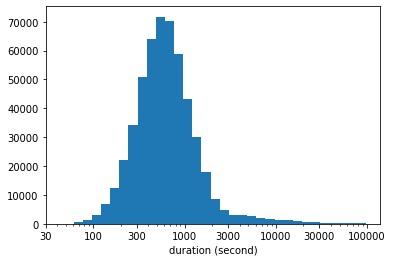

In [108]:
bin_edges = 10 ** np.arange(1.785330, 4.936358 + 0.1, 0.1)
ticks = [30,100,300,1000,3000,10000,30000,100000]
labls = ['{}'.format(v) for v in ticks]
plt.hist(data = df_clean, x ='duration_sec', bins = bin_edges);
plt.xscale("log");
plt.xlabel('duration (second)')
plt.xticks(ticks,labls);

Most of the riders travel duration time is between 500 to 1000 seconds

In [103]:
#Usage by females, males, and other
gender = df_clean.member_gender.value_counts()
gender


Male      348318
Female     98621
Other       6299
Name: member_gender, dtype: int64

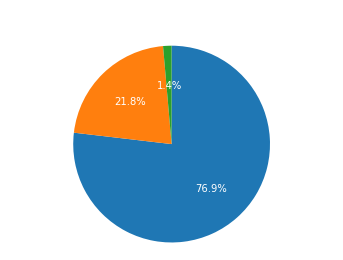

In [104]:
plt.pie(gender, labels = gender.index, startangle = 90, autopct= '%1.1f%%', counterclock = False, textprops={'color':'white'});
plt.axis('square');
plt.title('Ford GoBike System User by Gender', y=1.05, fontsize=16, fontweight='bold', color = 'white');

Here blue area represents the male riders.
Orange area represents female riders.
and green area represents others riders.

we can see that there are approx 76% Male riders, 21% female riders and rest riders of other gender.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
In Univariate Exploration only a single variable is used to find the insight and compare to other.The more number of male gender using the bike. And most travel time by male gender is between 0-500. 

### Of the features you investigated, were there any unusual distributions?
>No, Not any unusual distributions present.


## Bivariate Exploration


In [68]:
# Customers vs Subscribers
customer = df_clean.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_clean.query('user_type == "Subscriber"')['bike_id'].count()
customer_prop = customer / df_clean['bike_id'].count()
subscriber_prop = subscriber / df_clean['bike_id'].count()

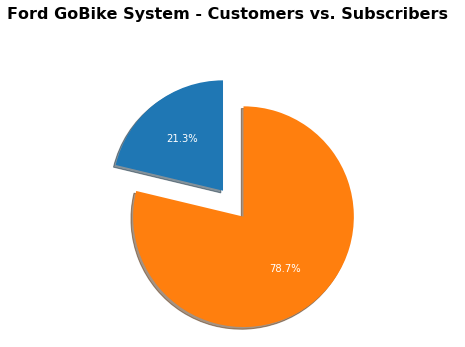

In [69]:
# Customers vs Subscribers Visuals
# pie chart
plt.figure(figsize = [8, 5])

labels = ['Customer', 'Subscriber']
size = [customer_prop, subscriber_prop]
explode = (0, 0.3)

plt.pie(size, explode=explode, labels = labels, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'color':'white'})
plt.axis('equal')

plt.suptitle('Ford GoBike System - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');

There are approx 79% subscriber and 21% customer using the service of fordgo-bikes service

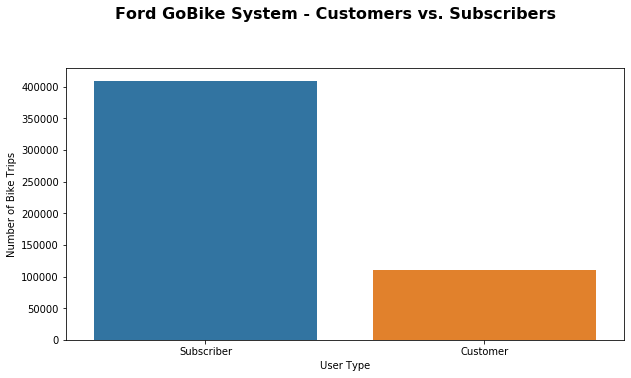

In [70]:

# Customers vs Subscribers Visuals
# bar chart
plt.figure(figsize = [10, 5])

graph = sb.countplot(data = df_clean ,x = "user_type", order = df_clean.user_type.value_counts().index);
graph.set_xlabel('User Type');
graph.set_ylabel('Number of Bike Trips');
plt.suptitle('Ford GoBike System - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');

This plot shows count of subscriber and customer using the fordgo-bike service. as we can see from the plot that there are more than 400000 trips taken by the subscriber and more than 100000 rides was taken by customer

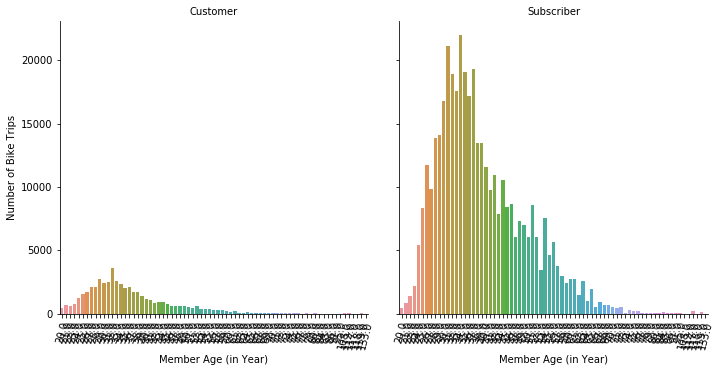

In [76]:
# Customer Usage by Month vs. Subscriber Usage by Month
#plt.figure(figsize = [12, 5])-color
graph = sb.catplot(data=df_clean, x='member_age', col="user_type", kind='count', sharey = True );

graph.set_axis_labels("Member Age (in Year)", "Number of Bike Trips");
graph.set_titles("{col_name}");

graph.set_xticklabels(rotation=75);

This shows subscriber takes more no of trips than customers and most of the subscriber age taking the trip is nearly 30 to 35 years age

## Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

In Bivariate exploration, we use two variables to compare and visualize the data, in which we can easily get the maximum and average of the dataset.

## Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Yes, Subscriber uses more bike ride than customer but customer travel more distance and take longer time.

## Multivariate Exploration


### 2-d bar chart member_gender vs user_type vs duration_sec

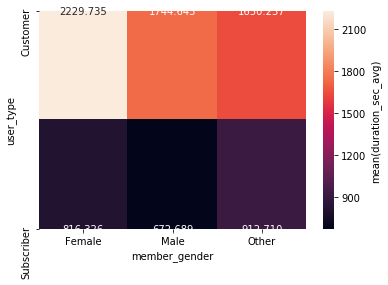

In [83]:

cat_means = df.groupby(['member_gender', 'user_type']).mean()['duration_sec']
cat_means = cat_means.reset_index(name = 'duration_sec_avg')
cat_means = cat_means.pivot(index = 'user_type', columns = 'member_gender',
                            values = 'duration_sec_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(duration_sec_avg)'});

The dark area shows the most no of duration taken by two user type - subscriber and customer
As we can see that most no of duration rides are taken by male subscriber and then female subscriber and other subscriber.
Female Customers have taken less no of rides

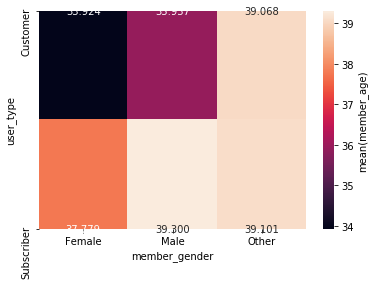

In [84]:
cat_means = df_clean.groupby(['member_gender', 'user_type']).mean()['member_age']
cat_means = cat_means.reset_index(name = 'member_age')
cat_means = cat_means.pivot(index = 'user_type', columns = 'member_gender',
                            values = 'member_age')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(member_age)'});

here from the plot we can see that most of the female customers are of 34 years age and of male customers are of 35-36 years age.
and most of the female subscriber are of 37 to 38 years of age and male subscribers are of approx 40 years age

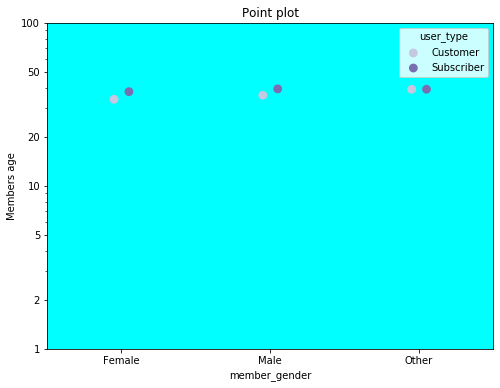

In [96]:

fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_clean, x = 'member_gender', y = 'member_age', hue = 'user_type',
           palette = 'Purples', linestyles = '', dodge = 0.1);
plt.title('Point plot');
plt.ylabel('Members age')
ax.set_facecolor('xkcd:cyan')
plt.yscale('log');
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
ax.set_yticklabels([],minor = True);

A dodged point plot for user member gender of different ages. there are two user types customer and subscriber.

average age of most of the user types and genders is of 30 to 40 year


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interests?



We plot member, gender, member's age. The age group of people belongs to 25 to 40 and male traveller is more than female and other traveller.

# Summary

Most of the riders are male subscribers. most members are of age around 25 to 40 years old. Though not a huge difference, male riders tend to have shorter trips compared to female users. Riders who rented the bikes from Monday to Friday are older than those who ride on weekends.